In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
num_bds = 10
num_rounds = 4000
num_trial = 100
epss = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25]

qs = np.random.rand(num_bds)*3
ss = np.random.rand(num_bds)
res = np.zeros((num_trial, len(epss), num_rounds+1))

for k in range(num_trial):
    for i, eps in enumerate(epss):
        es = np.zeros(num_bds)
        acms = np.zeros(num_bds)
        cnts = np.zeros(num_bds).astype(np.int)
        for j in range(1, num_rounds+1):
            rnd = np.random.rand()
            if j == 1 or rnd < eps:
                bd = np.random.choice(num_bds)
            else:
                bd = np.argmax(es)

            rwd = np.random.normal(qs[bd], ss[bd])
            res[k, i, j] = rwd

            acms[bd] += rwd
            cnts[bd] += 1
            es[bd] = acms[bd]/cnts[bd]

res_tot = np.cumsum(res, axis=2)[:, :, -1]
res_tot_avg = res_tot.mean(axis=0)

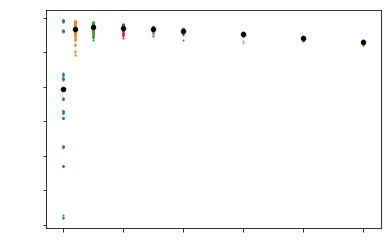

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, eps in enumerate(epss):
    ax.scatter(eps*np.ones(res_tot.shape[0]), res_tot[:, i], s=1)
    ax.scatter(eps, res_tot_avg[i], c=(0,0,0), s=20)
plt.xticks(color=(1,1,1))
plt.yticks(color=(1,1,1))
plt.show()

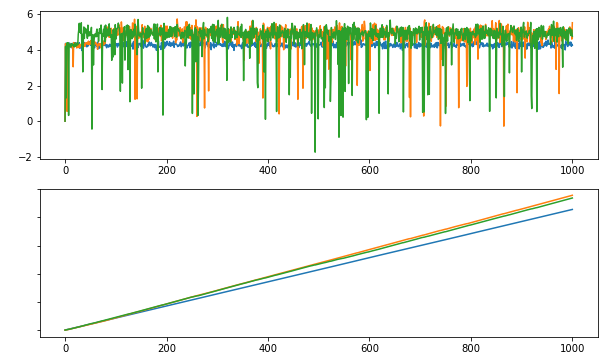

In [123]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
for i in range(len(epss)):
    ax[0].plot(np.arange(num_rounds+1), res[i, :])
    ax[1].plot(np.arange(num_rounds+1), np.cumsum(res[i, :]))
plt.yticks(color=(1,1,1))
#plt.legend(['0.0', '0.1', '0.2'])
plt.show()

In [ ]:
np.random.